<a href="https://colab.research.google.com/github/luiscarlosm33/SIM_YAC_UPSE2023/blob/main/class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import numpy as np 
import math

In [142]:
L=1000
dx=100
Tiempo=100000
DT=100
Alpha=1
Lambda=Alpha*DT/(dx**2)

In [143]:
Distance=np.arange(0,L,dx)
P01=np.ones_like(Distance)
PYac=1000
PFrontd=0 #Frontera derecha
PFronti=0 #Frontera izquierda
P01=P01*PYac
P01[0]=PFronti
P01[len(P01)-1]=PFrontd
N=len(Distance)

VectorTiempo=np.arange(0,(Tiempo//DT)*DT,DT)

In [144]:
PM=np.zeros([len(VectorTiempo),N])
PA=np.zeros([len(VectorTiempo),N])

In [145]:
PM.shape

(1000, 10)

In [146]:
A=np.zeros([N-2, N-2])
M=np.zeros([N-2, N-2])
d=np.zeros(N-2)

In [147]:
for i in range(N-2) :
  A[i,i]=1+2*Lambda
  if i>0:
    A[i,i-1]=-Lambda
  if i<(N-3):
    A[i,i+1]=-Lambda




In [148]:
b=-Alpha/(2*dx**2)
for i in range(N-2) :
  M[i,i]=1/DT -2*b
  if i>0:
    M[i,i-1]=b
  if i<(N-3):
    M[i,i+1]=b
  


In [149]:
def filld(Pn):
  d=np.zeros(N-2)
  for i in range(N-2):
    d[i]=-b*Pn[i] +(1/DT+2*b)*Pn[i+1]-b*Pn[i+2] 
  return d


In [150]:
Pcal=np.linalg.solve(A,P01[1:-1])

In [151]:

Pfin=np.concatenate(([PFronti],Pcal,[PFrontd]))

In [152]:
Pfin

array([  0.        , 990.19513593, 999.90386464, 999.9990574 ,
       999.99999067, 999.99999067, 999.9990574 , 999.90386464,
       990.19513593,   0.        ])

In [156]:
PM[0]=P01
PA[0]=P01
Pactual=P01
Pactual2=P01
for t in range(1,Tiempo//DT):
  d=filld(Pactual)
  Pcal=np.linalg.solve(M,d)
  Pcal2=np.linalg.solve(A,Pactual2[1:-1])
  Pactual2=np.concatenate(([PFronti],Pcal2,[PFrontd]))
  Pactual=np.concatenate(([PFronti],Pcal,[PFrontd]))
  PM[t]=Pactual
  PA[t]=Pactual2





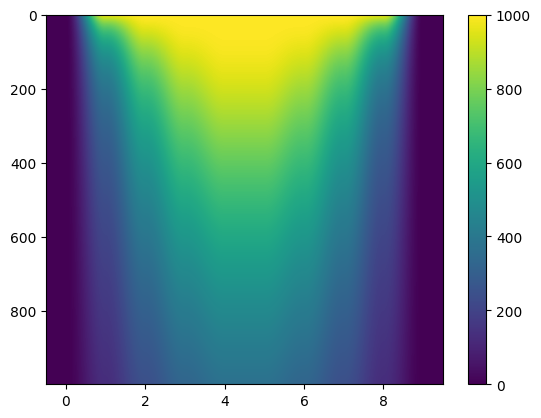

In [157]:

import matplotlib.pyplot as plt

imgplot = plt.imshow(PM,aspect='auto')
plt.colorbar()
     

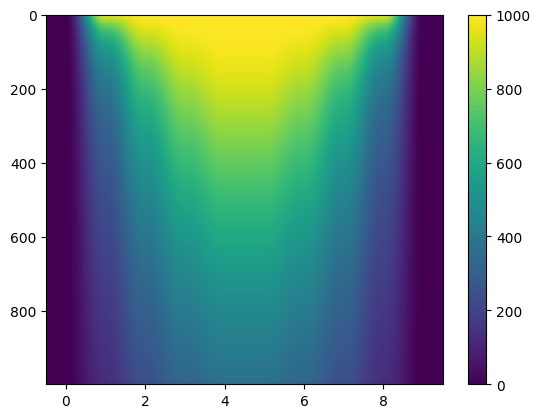

In [158]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(PA,aspect='auto')
plt.colorbar()